# Lesson 9: Introduction to Sequence Modelling

Intro - lots of things come as sequences, and text is common!

## Embeddings: Working With Tokens

Concept of embeddings

Reference https://deeplearning.neuromatch.io/tutorials/W2D5_TimeSeriesAndNaturalLanguageProcessing/student/W2D5_Tutorial1.html and maybe link Lyle's 'Embeddings Rule' video?


In [ ]:
import torch
from torch import nn
from datasets import load_dataset
from tokenizers import Tokenizer
from tokenizers.models import BPE
from tokenizers.trainers import BpeTrainer
from transformers import PreTrainedTokenizerFast

## Modelling Sequences: Language Models

Explain the objective

## Tokenizing Text

How do we split up text into tokens? We often talk about 'words' being the unit of text, but if we just go with a token for each word that we might encounter you'll end up with a massive (1M) vocabulary filled with mostly obscure/misspelled words. But on the other hand letters would mean using far more tokens to represent the same sentence. 

One solution.. explain wordpiece and co

Tokenizers: https://huggingface.co/docs/tokenizers/index



In [ ]:
tokenizer = Tokenizer.from_pretrained("bert-base-uncased")

In [ ]:
encoding = tokenizer.encode('What a nice flooble!')
print('Encoding:', encoding)

ids = encoding.ids
print('ids:', ids)

Encoding: Encoding(num_tokens=9, attributes=[ids, type_ids, tokens, offsets, attention_mask, special_tokens_mask, overflowing])
ids: [101, 2054, 1037, 3835, 13109, 9541, 3468, 999, 102]


In [ ]:
for t in ids:
    print(f'{t}:{tokenizer.decode([t])}')

101:
2054:what
1037:a
3835:nice
13109:fl
9541:##oo
3468:##ble
999:!
102:


We have special tokens for start (101), end (102), symbols like '!' (999) and separate tokens for a string like 'oo' or 'ble' if they don't occur at the start of a word. Common words get a token, uncommon ones like flooble are broken down into components. THe full vocabulary size of this tokenizer is about 30,000 tokens:

In [ ]:
len(tokenizer.get_vocab().items()) # The vocab size of this tokenizer

30522

## Creating Our Own Tokenizer

Explain

In [ ]:
dataset = load_dataset('tglcourse/abc_tunes', split='train').shuffle()
dataset[0]

Using custom data configuration tglcourse--abc_tunes-5a89386c12e016f6
Reusing dataset parquet (/root/.cache/huggingface/datasets/tglcourse___parquet/tglcourse--abc_tunes-5a89386c12e016f6/0.0.0/7328ef7ee03eaf3f86ae40594d46a1cec86161704e02dd19f232d81eee72ade8)


{'Title': "Pat Hogan's One",
 'Time Signature': '2/4',
 'L': '1/8',
 'Key': 'Edor',
 'Tune': 'D>D FA|dc BA|BE EF|GA/G/ FE|D>D FA|dcBA|Be Bc|d2 d2:||:eB eB|eB B>c|dA dA|dA A2|eB eB|eB B>c|dB AF|E2 E2:|'}

In [ ]:
vocab_size = 100 # Explore different vocab sizes
tokenizer = Tokenizer(BPE(unk_token="[UNK]"))
trainer =BpeTrainer(special_tokens=["[UNK]", "[PAD]"],
                    vocab_size=vocab_size) 
tokenizer.train_from_iterator(dataset['Tune'], trainer)

In [ ]:
tokenizer = PreTrainedTokenizerFast(tokenizer_object=tokenizer,
                                    pad_token="[PAD]",
                                    unk_token="[UNK]")


In [ ]:
# TODOSee the docs for pre-tokenizer options: https://huggingface.co/docs/tokenizers/quicktour

In [ ]:
# ??tokenizer.train

Printing out the decoded string (using '#' as a separator) we ca see how the tune has turned into discrete tokens, some of thich are individual notes but many of which are combined.

In [ ]:
ids = tokenizer.encode(dataset[0]['Tune']) # .ids if using the Tokenizer version
print(ids)
decoded = '#'.join([tokenizer.decode([t]) for t in ids])
print(decoded)

[40, 34, 40, 4, 42, 37, 95, 71, 70, 4, 38, 37, 95, 38, 41, 4, 41, 42, 95, 43, 37, 19, 43, 19, 4, 42, 41, 95, 40, 34, 40, 4, 42, 37, 95, 71, 70, 38, 37, 95, 38, 72, 4, 38, 70, 95, 71, 22, 4, 71, 22, 30, 95, 95, 30, 72, 38, 4, 72, 38, 95, 72, 38, 4, 38, 34, 70, 95, 71, 37, 4, 71, 37, 95, 71, 37, 4, 37, 22, 95, 72, 38, 4, 72, 38, 95, 72, 38, 4, 38, 34, 70, 95, 71, 38, 4, 37, 42, 95, 41, 22, 4, 41, 22, 30, 95]
D#>#D# #F#A#|#d#c# #B#A#|#B#E# #E#F#|#G#A#/#G#/# #F#E#|#D#>#D# #F#A#|#d#c#B#A#|#B#e# #B#c#|#d#2# #d#2#:#|#|#:#e#B# #e#B#|#e#B# #B#>#c#|#d#A# #d#A#|#d#A# #A#2#|#e#B# #e#B#|#e#B# #B#>#c#|#d#B# #A#F#|#E#2# #E#2#:#|


In [ ]:
print(tokenizer.get_vocab())

{'q': 84, '}': 96, 'í': 107, 'e': 72, '@': 36, 't': 87, 'ó': 109, 'U': 57, 'i': 76, '6': 26, '(': 12, 'b': 69, 'º': 101, '~': 97, 'f': 73, 'v': 89, '\t': 3, 'Q': 53, 'S': 55, '0': 20, '#': 7, '4': 24, 'Z': 62, 'ä': 104, 'T': 56, 'D': 40, '\x08': 2, '/': 19, '9': 29, 'G': 43, 'Y': 61, ')': 13, 'A': 37, '.': 18, 'I': 45, 'J': 46, 'á': 103, 'è': 105, 'V': 58, "'": 11, '^': 66, 'o': 82, '¬': 100, 'm': 80, '=': 33, 'p': 83, '!': 5, '[PAD]': 1, 'd': 71, 'z': 93, 'Ú': 102, '5': 25, ':': 30, '"': 6, '+': 15, 'M': 49, '$': 8, '<': 32, '&': 10, 'H': 44, 'N': 50, 'h': 75, 'é': 106, 'ñ': 108, 'F': 42, '*': 14, '\\': 64, 'l': 79, '[UNK]': 0, '2': 22, 'L': 48, 'E': 41, 'K': 47, 'a': 68, '\xa0': 98, 'R': 54, '7': 27, 'k': 78, '3': 23, ',': 16, '[': 63, '%': 9, 'ú': 110, 'n': 81, 'w': 90, 's': 86, 'c': 70, 'P': 52, '_': 67, 'y': 92, 'X': 60, ']': 65, 'r': 85, ';': 31, 'W': 59, '-': 17, 'u': 88, '8': 28, 'x': 91, 'g': 74, '{': 94, '|': 95, 'ª': 99, '>': 34, ' ': 4, '?': 35, '1': 21, 'B': 38, 'C': 39, '

## An Embedding Layer

In [ ]:
emb_dim = 32
emb_layer = nn.Embedding(vocab_size, emb_dim)
emb_layer

Embedding(100, 32)

In [ ]:
emb_layer(torch.tensor(ids)).shape # Passing our tokens through

torch.Size([106, 32])

## A simple MLP

Similar to Karpathy's makemore demo (TODO link)

How do we work with sequences of different lengths? Padding + truncation seem non-ideal...

In [ ]:
batch_size=32
seq_len=64
batch_ids = torch.randint(vocab_size, (batch_size,seq_len))
batch_ids.shape

torch.Size([32, 64])

In [ ]:
emb_layer(batch_ids).shape

torch.Size([32, 64, 32])

In [ ]:
# A minimal model (output sizes shown
model = nn.Sequential(
    nn.Embedding(vocab_size, emb_dim), # (batch_size, seq_length, emb_dim)
    nn.Flatten(), # (batch_size, seq_length*emb_dim)
    nn.Linear(emb_dim*seq_len, 64), # (batch_size, 64)
    nn.ReLU(), # (batch_size, 64)
    nn.Linear(64, 2), # (batch_size, 2)
    
)
model(batch_ids).shape

torch.Size([32, 2])

Q: What happens when word position changes?
Q: Would this work on different length sequences?
Q: think of more Qs

## Recurrent Neural Networks and LSTMs

Explain the basic architecture

https://pytorch.org/docs/stable/generated/torch.nn.RNN.html

![an unrolled RNN](https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/RNN-unrolled.png)

Maybe demo?

Brief hand-wave explanation of LSTMs and link ULMFIT and co for the curious

Great blog by colah https://colah.github.io/posts/2015-08-Understanding-LSTMs/
Karpathy on RNN effectiveness: http://karpathy.github.io/2015/05/21/rnn-effectiveness/



In [ ]:
# Create the RNN
input_size = 10 # Number of features in the input (embedding dim)
hidden_size = 20 # Number of features in the hidden state h
num_layers = 1 # Set to 2 for a 'stacked' RNN with 2 layers
rnn = nn.RNN(input_size, hidden_size, num_layers) # The model

# Run some dummy data through
# Create the model with batch_first=True if you'd like the batch dimension to come first
batch_size = 8
input_length = 5
x = torch.randn(5, batch_size, input_size)
h0 = torch.randn(num_layers, batch_size, hidden_size)
output, hn = rnn(x, h0)

# Check the output shapes
output.shape, hn.shape

(torch.Size([5, 8, 20]), torch.Size([1, 8, 20]))

In [ ]:
class MyRNNClassifier(nn.Module):
    def __init__(self, input_size=10, hidden_size=20, num_layers=2):
        super().__init__()
        self.emb_layer = nn.Embedding(vocab_size, input_size)
        self.rnn = nn.RNN(input_size, hidden_size, num_layers=num_layers)
        self.mlp = nn.Linear(hidden_size, 2)
        
    def forward(self, x):
        x = self.emb_layer(x) # TO embeddings (batch_size, seq_len, input_size)
        net_output, h = self.rnn(x) # Through RNN (batch_size, seq_len, hidden_size)
        averaged_output = net_output.mean(dim=1) # Take the mean of the outputs ('mean pooling')
        result = self.mlp(averaged_output) # THrough the linear layer or MLP to get 2 outputs (assuming binary classification)
        return result
    


In [ ]:
net = MyRNNClassifier()
net(batch_ids).shape

torch.Size([32, 2])

In [ ]:
sum([p.numel() for p in net.parameters()])

2522

In [ ]:
[p.shape for p in net.parameters()]

[torch.Size([100, 10]),
 torch.Size([20, 10]),
 torch.Size([20, 20]),
 torch.Size([20]),
 torch.Size([20]),
 torch.Size([20, 20]),
 torch.Size([20, 20]),
 torch.Size([20]),
 torch.Size([20]),
 torch.Size([2, 20]),
 torch.Size([2])]

In [ ]:
# TODO try on some data

**LSTMs**

https://colah.github.io/posts/2015-08-Understanding-LSTMs/

something something memory

In [ ]:
class MyLSTMClassifier(nn.Module):
    def __init__(self, input_size=10, hidden_size=20, num_layers=2):
        super().__init__()
        self.emb_layer = nn.Embedding(vocab_size, input_size)
        self.rnn = nn.LSTM(input_size, hidden_size, num_layers=num_layers)
        self.mlp = nn.Linear(hidden_size, 2)
        
    def forward(self, x):
        x = self.emb_layer(x) # TO embeddings (batch_size, seq_len, input_size)
        net_output, h = self.rnn(x) # Through RNN (batch_size, seq_len, hidden_size)
        averaged_output = net_output.mean(dim=1) # Take the mean of the outputs ('mean pooling')
        result = self.mlp(averaged_output) # THrough the linear layer or MLP to get 2 outputs (assuming binary classification)
        return result
    


In [ ]:
net = MyLSTMClassifier()
net(batch_ids).shape

torch.Size([32, 2])

In [ ]:
sum([p.numel() for p in net.parameters()])

6962

## Using Learned Representations

Do review classification or something using a learned embedding combined with an RNN? Or model tunes and then classify into type/key/mode?

Yeah tunes will be good. LM objective first, then re-training

In [ ]:
class LM(nn.Module):
    def __init__(self, input_size=32, hidden_size=128, num_layers=2, vocab_size=200):
        super().__init__()
        self.emb_layer = nn.Embedding(vocab_size, input_size)
        self.rnn = nn.LSTM(input_size, hidden_size, num_layers=num_layers)
        self.mlp = nn.Linear(hidden_size, vocab_size)
        
    def forward(self, x):
        x = self.emb_layer(x) # TO embeddings (batch_size, seq_len, input_size)
        rnn_output, h = self.rnn(x) # Through RNN (batch_size, seq_len, hidden_size)
        return self.mlp(rnn_output)
        

In [ ]:
lm = LM()
tokeized_tune = torch.tensor([tokenizer.encode(dataset[0]['Tune'])])
x = tokeized_tune[:,:-1] # All but the last token
y = tokeized_tune[:,1:] # All but the first token (x shifted by 1)
x.shape, lm(x).shape, y.shape

(torch.Size([1, 105]), torch.Size([1, 105, 200]), torch.Size([1, 105]))

In [ ]:
torch.tensor(tokenizer(dataset['Tune'][:10], padding=True)['input_ids']).shape

torch.Size([10, 339])

In [ ]:
def lm_loss_function(model_pred, y):
    b, n, vc = model_pred.shape
    pred = model_pred.reshape(b*n, vc)
    target = y.flatten()
    return nn.functional.cross_entropy(pred, target)

lm_loss_function(lm(x), y)

tensor(5.2998, grad_fn=<NllLossBackward0>)

In [ ]:
from datasets import Dataset

In [ ]:
dataset = load_dataset('tglcourse/abc_tunes', split='train').shuffle()
max_length = 201
tokenized_tunes = tokenizer(dataset['Tune'], padding=True, truncation=True, max_length=max_length)['input_ids']
lm_dataset = Dataset.from_dict({
    'x':torch.tensor([t[:-1] for t in tokenized_tunes]),
    'y':torch.tensor([t[1:] for t in tokenized_tunes]),
})
lm_dataloader = torch.utils.data.DataLoader(lm_dataset.with_format("torch"), batch_size=256)

Using custom data configuration tglcourse--abc_tunes-5a89386c12e016f6
Reusing dataset parquet (/root/.cache/huggingface/datasets/tglcourse___parquet/tglcourse--abc_tunes-5a89386c12e016f6/0.0.0/7328ef7ee03eaf3f86ae40594d46a1cec86161704e02dd19f232d81eee72ade8)


In [ ]:
batch = next(iter(lm_dataloader))
batch['x'].shape, batch['y'].shape

(torch.Size([256, 200]), torch.Size([256, 200]))

In [ ]:
from tqdm.notebook import tqdm

In [ ]:
lm = LM().cuda()
optimizer = torch.optim.Adam(lm.parameters(), lr=1e-4)
losses = []
for epoch in range(10):
    for batch in tqdm(lm_dataloader):
        x = batch['x'].cuda()
        y = batch['y'].cuda()
        model_preds = lm(x)
        loss = lm_loss_function(lm(x), y)
        loss.backward()
        losses.append(loss.item())
        optimizer.step()
        optimizer.zero_grad()

  0%|          | 0/76 [00:00<?, ?it/s]

  0%|          | 0/76 [00:00<?, ?it/s]

  0%|          | 0/76 [00:00<?, ?it/s]

  0%|          | 0/76 [00:00<?, ?it/s]

  0%|          | 0/76 [00:00<?, ?it/s]

  0%|          | 0/76 [00:00<?, ?it/s]

  0%|          | 0/76 [00:00<?, ?it/s]

  0%|          | 0/76 [00:00<?, ?it/s]

  0%|          | 0/76 [00:00<?, ?it/s]

  0%|          | 0/76 [00:00<?, ?it/s]

[<matplotlib.lines.Line2D>]

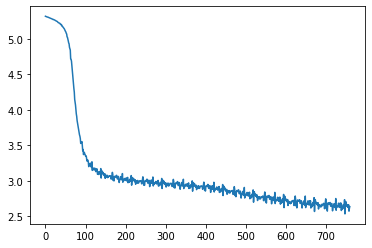

In [ ]:
from matplotlib import pyplot as plt
plt.plot(losses)

In [ ]:
import numpy as np
def generate(model, start_text, n, max_length=200, top_k=None):
    model.eval()
    tokenized_start = torch.tensor([tokenizer(start_text)['input_ids']]).cuda()
    x = tokenized_start
    for i in range(n):
        model_pred = model(x)
        last_word_logits = model_pred[0][0]
        p = torch.nn.functional.softmax(last_word_logits, dim=0).data
        
        # Set p to zero for special tokens we don't want
        p[:4] = 0
        
        # Sample
        if top_k is None:
            candidate_tokens = np.arange(len(last_word_logits))
        else:
            p, candidate_tokens = p.topk(top_k)
            candidate_tokens = candidate_tokens.detach().cpu().numpy().squeeze()
        p = p.detach().cpu().numpy().squeeze()
        word_index = np.random.choice(candidate_tokens, p=p/p.sum())
        x = torch.cat([x, torch.tensor([[word_index]]).cuda()], dim=-1)
        
    return tokenizer.decode(x.flatten())
generate(lm, 'B|F', 20)

'B | F b Z X, c : Y º B l [ B'

In [ ]:
generate(lm, 'B|F', 200,top_k=20)

'B | F 2 e F 3 ( ( a / A c E A E " " a d a g c E D :   A c   B F   f G : / d   a c A : f D E ( a " e 2 D 2 F 2 3 E " c a f 2 2 A G " d E / E G c 2 / D a | 2 B D f B B   g e c e d B e g   ( f ( D g 3 G e : c g g g ( : | 2 2 / : a " F G c 3 f " F / | f " c E 3 F a g F | f e G 2 D f E d E f a g G ( 3 c g ( G / E F 3 : ( " 2 3 2 ( e G G E c / A g : / B e a / /   d : A f c / : E 2 " f : 3 G | / | d | / F " F'

In [ ]:
sum([p.numel() for p in lm.parameters()])

247240

In [ ]:
# TODO try on some data (LM first then new classification head)

In [ ]:
# TODO talk about efficiency of training vs sampling
# TODO demo different sampling approaches

Page stats: Total Hits: [![HitCount](https://hits.dwyl.com/johnowhitaker/tglcourse.svg?style=flat-square&show=unique)](http://hits.dwyl.com/johnowhitaker/tglcourse)
Page visitors:
![visitor badge](https://page-views.glitch.me/badge?page_id=tglcourse.l09)